turkey_20_years_AgglomerativeClustering

Engin Abdan

### Import

In [960]:
import pandas as pd
import numpy as np
import pandasdmx as pdmx

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [961]:
df = pd.read_csv("turkey_57_col_data_with_class.csv")
df.head(2)

,Unnamed: 0,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
0,0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.97350,57.999863,...,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0
1,1,2003,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.24582,48.578784,...,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271,0


### Data Cleaning

In [962]:
df = df.drop(columns=["Unnamed: 0"])

In [963]:
df = df.apply(pd.to_numeric)

In [964]:
df.shape

(19, 57)

In [965]:
df.duplicated().any()

False

In [966]:
df.isnull().any()

year        False
cpi         False
anni        False
bm          False
cgdt        False
coe         False
coubaa      False
dcpbfs      False
dctps       False
dctpsbb     False
epfngs      False
eia         False
eii         False
eis         False
ein         False
evi         False
fe          False
fi          False
fa          False
gg          False
g           False
gpc         False
ge          False
gi          False
gne         False
gs          False
ishbh2      False
icp         False
ip          False
itnoa       False
lft         False
lucp        False
nca         False
or          False
ngr         False
par         False
pga$ad      False
pga$ad.1    False
pga$ad.2    False
pcrc        False
sgei        False
sd          False
tr          False
tarbc       False
uwae        False
uwbe        False
uwie        False
um          False
uf          False
wpi         False
coce        False
gee         False
psaaove     False
rqe         False
role        False
vaae      

In [967]:
df.year.nunique()

19

In [968]:
df.describe()

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
count,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2011.000000,122.142585,5.890158e+11,48.541178,35.481514,23.028000,1.223756,67.358661,52.800994,43.506416,...,9.866579,11.614579,95.638045,-0.101205,0.180211,-1.098712,0.212795,-0.030248,-0.299990,1.631579
std,5.627314,61.619635,1.790208e+11,8.796303,6.636303,1.289855,0.234011,15.209500,14.538423,19.833066,...,1.452192,2.104188,24.974187,0.190258,0.147116,0.380950,0.153134,0.170394,0.312944,1.116071
min,2002.000000,46.096344,1.929000e+11,33.201796,25.821531,20.234484,0.827595,43.132762,32.163306,14.010660,...,7.618000,9.096000,45.838839,-0.521816,-0.044045,-2.009063,-0.010660,-0.358622,-0.861699,0.000000
25%,2006.500000,75.332820,5.000000e+11,41.061971,31.210337,22.066965,1.168818,56.014097,39.182404,26.369867,...,8.891500,10.021000,78.362330,-0.192975,0.050269,-1.284413,0.050771,-0.160934,-0.487452,1.000000
50%,2011.000000,106.471880,6.428000e+11,51.492837,34.487813,23.015411,1.246865,67.600520,51.838073,46.159692,...,9.527000,11.181000,99.237610,-0.147864,0.154204,-1.031842,0.270881,0.036303,-0.206933,1.000000
75%,2015.500000,151.746310,7.220500e+11,53.017268,38.622834,23.780323,1.277547,78.593766,65.993824,62.214092,...,10.721000,13.103000,117.982141,0.066016,0.300704,-0.820559,0.307977,0.093975,-0.054424,3.000000
max,2020.000000,263.223561,8.120000e+11,67.500617,50.112956,25.003545,1.826806,98.377291,75.176625,70.920243,...,12.528000,16.385000,126.076931,0.157575,0.408412,-0.589657,0.429084,0.159731,0.013202,3.000000


In [969]:
df.head(2)

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.97350,57.999863,14.054762,...,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0
1,2003,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.24582,48.578784,14.010660,...,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271,0


In [970]:
# df COLUMN ABBREVIATION

# 'year': 'year',
# 'cpi': 'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
# 'anni': 'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]',
# 'bm': 'Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS]',
# 'cgdt': 'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
# 'coe': 'Compensation of employees (% of expense) [GC.XPN.COMP.ZS]',
# 'coubaa': 'Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot]',
# 'dcpbfs': 'Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS]',
# 'dctps': 'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
# 'dctpsbb': 'Domestic credit to private sector by banks (% of GDP) [FD.AST.PRVT.GD.ZS]',
# 'epfngs': 'Electricity production from natural gas sources (% of total) [EG.ELC.NGAS.ZS]',
# 'eia': 'Employment in agriculture (% of total employment) (modeled ILO estimate) [SL.AGR.EMPL.ZS]',
# 'eii': 'Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]',
# 'eis': 'Employment in services (% of total employment) (modeled ILO estimate) [SL.SRV.EMPL.ZS]',
# 'ein': 'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
# 'evi': 'Export value index (2000 = 100) [TX.VAL.MRCH.XD.WD]',
# 'fe': 'Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]',
# 'fi': 'Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN]',
# 'fa': 'Forest area (% of land area) [AG.LND.FRST.ZS]',
# 'gg': 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
# 'g': 'GDP (current US$) [NY.GDP.MKTP.CD]',
# 'gpc': 'GDP per capita (current US$) [NY.GDP.PCAP.CD]',
# 'ge': 'Goods exports (BoP, current US$) [BX.GSR.MRCH.CD]',
# 'gi': 'Goods imports (BoP, current US$) [BM.GSR.MRCH.CD]',
# 'gne': 'Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS]',
# 'gs': 'Gross savings (% of GDP) [NY.GNS.ICTR.ZS]',
# 'ishbh2': 'Income share held by highest 20% [SI.DST.05TH.20]',
# 'icp': 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
# 'ip': 'Interest payments (% of revenue) [GC.XPN.INTP.RV.ZS]',
# 'itnoa': 'International tourism, number of arrivals [ST.INT.ARVL]',
# 'lft': 'Labor force, total [SL.TLF.TOTL.IN]',
# 'lucp': 'Land under cereal production (hectares) [AG.LND.CREL.HA]',
# 'nca': 'Net capital account (BoP, current US$) [BN.TRF.KOGT.CD]',
# 'or': 'Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS]',
# 'ngr': 'Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS]',
# 'par': 'Patent applications, residents [IP.PAT.RESD]',
# 'pga$ad': 'Poverty gap at $5.50 a day (2011 PPP) (%) [SI.POV.UMIC.GP]',
# 'pcrc': 'Public credit registry coverage (% of adults) [IC.CRD.PUBL.ZS]',
# 'sgei': 'S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG]',
# 'sd': 'Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS]',
# 'tr': 'Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]',
# 'tarbc': 'Trademark applications, resident, by count [IP.TMK.RSCT]',
# 'uwae': 'Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS]',
# 'uwbe': 'Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS]',
# 'uwie': 'Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS]',
# 'um': 'Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]',
# 'uf': 'Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]',
# 'wpi': 'Wholesale price index (2010 = 100) [FP.WPI.TOTL]'
# 'coce': 'Control of Corruption: Estimate [CC.EST]',
# 'gee': 'Government Effectiveness: Estimate [GE.EST]',
# 'psaaove': 'Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]',
# 'rqe': 'Regulatory Quality: Estimate [RQ.EST]',
# 'role': 'Rule of Law: Estimate [RL.EST]',
# 'vaae': 'Voice and Accountability: Estimate [VA.EST]

### Skewness

In [971]:
from scipy.stats import skew
x = df.drop(columns=["year"]).columns
for i in x:
    y = skew(df[i])
    if np.all((y >= -0.5) ^ (y < 0.5)) :
        print(f"{i} \t\t: {y} \t>>> Normal")
    elif np.all((y >= 0.5) ^ (y < 1.0)):
        print(f"{i} \t\t: {y} \t>>> Moderate")
    elif y >= 1.0:
        print(f"{i} \t\t: {y} \t>>> Skewed")       

cpi 		: 0.8635331831082094 	>>> Normal
anni 		: -0.883821804374132 	>>> Normal
bm 		: -0.06969915092846944 	>>> Moderate
cgdt 		: 0.5431601587326815 	>>> Normal
coe 		: -0.29561220199915855 	>>> Moderate
coubaa 		: 0.3294652362378151 	>>> Moderate
dcpbfs 		: -0.039993825121007624 	>>> Moderate
dctps 		: -0.06896035524664627 	>>> Moderate
dctpsbb 		: -0.18503221620791524 	>>> Moderate
epfngs 		: -1.0017848104022045 	>>> Normal
eia 		: -0.33062824782079175 	>>> Moderate
eii 		: 0.0639717783721139 	>>> Moderate
eis 		: 0.5408547132399956 	>>> Normal
ein 		: -0.17951687367586117 	>>> Moderate
evi 		: -0.5660014961802119 	>>> Normal
fe 		: -0.4209935245798764 	>>> Moderate
fi 		: 0.07515384755257262 	>>> Moderate
fa 		: 0.12473551546233085 	>>> Moderate
gg 		: -0.8169446642989834 	>>> Normal
g 		: -0.9081724648913699 	>>> Normal
gpc 		: -0.892260503989967 	>>> Normal
ge 		: -0.6610322161957429 	>>> Normal
gi 		: -0.7529807959579596 	>>> Normal
gne 		: -0.43717293733830953 	>>> Moderate
gs 	

In [972]:
from scipy.stats import skew
x = df.drop(columns=["year"]).columns
for i in x:
    a = df[i].mean()
    b = df[i].median()
    if np.any(a == b):
        print(f"{i} \t\t: Normal Skewed")
    elif np.any(a > b):
        print(f"{i} \t\t: Right Skewed")
    elif np.any(a < b):
        print(f"{i} \t\t: Left Skewed")

cpi 		: Right Skewed
anni 		: Left Skewed
bm 		: Left Skewed
cgdt 		: Right Skewed
coe 		: Right Skewed
coubaa 		: Left Skewed
dcpbfs 		: Left Skewed
dctps 		: Right Skewed
dctpsbb 		: Left Skewed
epfngs 		: Left Skewed
eia 		: Left Skewed
eii 		: Left Skewed
eis 		: Right Skewed
ein 		: Right Skewed
evi 		: Left Skewed
fe 		: Left Skewed
fi 		: Right Skewed
fa 		: Right Skewed
gg 		: Left Skewed
g 		: Left Skewed
gpc 		: Left Skewed
ge 		: Left Skewed
gi 		: Left Skewed
gne 		: Left Skewed
gs 		: Right Skewed
ishbh2 		: Normal Skewed
icp 		: Right Skewed
ip 		: Right Skewed
itnoa 		: Left Skewed
lft 		: Right Skewed
lucp 		: Right Skewed
nca 		: Left Skewed
or 		: Left Skewed
ngr 		: Right Skewed
par 		: Left Skewed
pga$ad 		: Right Skewed
pga$ad.1 		: Right Skewed
pga$ad.2 		: Right Skewed
pcrc 		: Right Skewed
sgei 		: Right Skewed
sd 		: Left Skewed
tr 		: Left Skewed
tarbc 		: Left Skewed
uwae 		: Right Skewed
uwbe 		: Right Skewed
uwie 		: Right Skewed
um 		: Right Skewed
uf 		: 

## AgglomerativeClustering & df

### Train Test Split

In [973]:
from sklearn.model_selection import train_test_split
X = df.drop(["year", "Class"], axis=1)
X.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,40.569552,...,14.70,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571
1,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,45.195297,...,12.77,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271
2,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,41.301809,...,15.19,10.788,10.988,63.940793,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202
3,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,45.348737,...,13.78,10.451,11.181,69.207544,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234
4,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,45.769403,...,11.08,8.586,9.096,75.966220,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095


### Scaling

In [974]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_min = scaler.fit_transform(X)
X_min = pd.DataFrame(data=X_min, columns=X.columns)
X_min.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,0.000000,0.000000,0.159177,0.511735,0.583118,0.380351,0.558259,0.600664,0.000775,0.611110,...,0.844482,0.633401,0.050899,0.000000,0.000000,0.281115,0.845762,0.253776,0.639056,0.733944
1,0.045862,0.101599,0.021230,0.213883,0.668236,0.419601,0.309769,0.381637,0.000000,0.807361,...,0.521739,0.630550,0.138291,0.146036,0.497446,0.212924,0.875114,0.123656,0.983280,0.946882
2,0.068060,0.231788,0.000000,0.043305,0.692023,0.442519,0.133896,0.212057,0.045014,0.642176,...,0.926421,0.645621,0.259569,0.225603,0.510277,0.116882,0.827702,0.155739,0.935396,1.000000
3,0.090991,0.368600,0.159678,0.000000,0.654480,0.449104,0.030640,0.091924,0.126746,0.813871,...,0.690635,0.576986,0.286047,0.291242,0.721973,0.438161,0.991629,0.655012,1.000000,0.985178
4,0.120099,0.438378,0.209795,0.083968,0.555607,0.439357,0.000000,0.021239,0.188243,0.831718,...,0.239130,0.197149,0.000000,0.375475,0.808315,0.362754,1.000000,0.681726,0.784935,0.911650


In [975]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(data=X_std, columns=X.columns)
X_std.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,-1.267941,-2.273313,-1.153953,0.428961,-0.010028,-0.070731,0.446833,0.367394,-1.525669,-0.171581,...,1.173148,0.609441,-1.048588,-2.048668,-2.271317,-0.677852,0.782463,-0.750477,0.017380,0.264021
1,-1.101910,-1.912329,-1.706580,-0.691166,0.313306,0.101458,-0.480473,-0.298375,-1.527954,0.471374,...,0.106200,0.599536,-0.737563,-1.566619,-0.446316,-0.893324,0.894824,-1.134370,1.093235,0.875648
2,-1.021550,-1.449765,-1.791630,-1.332658,0.403666,0.201997,-1.136790,-0.813842,-1.395249,-0.069801,...,1.444031,0.651890,-0.305937,-1.303980,-0.399243,-1.196796,0.713327,-1.039716,0.943576,1.028219
3,-0.938534,-0.963671,-1.151946,-1.495515,0.261052,0.230887,-1.522119,-1.179006,-1.154298,0.492701,...,0.664551,0.413468,-0.211702,-1.087313,0.377413,-0.181622,1.340849,0.433293,1.145494,0.985644
4,-0.833157,-0.715745,-0.951174,-1.179737,-0.114536,0.188126,-1.636461,-1.393867,-0.973003,0.551172,...,-0.828070,-0.905988,-1.229735,-0.809271,0.694181,-0.419891,1.372894,0.512109,0.473319,0.774450


### Hopkins

In [976]:
from pyclustertend import hopkins
print(f"No Scale \t: {hopkins(X, X.shape[0])}")
print(f"MinMax Scale \t: {hopkins(X_min, X_min.shape[0])}")
print(f"StdScl Scale \t: {hopkins(X_std, X_std.shape[0])}")
# Do Not Use Scaling

No Scale 	: 0.21968983673314085
MinMax Scale 	: 0.32335692414430023
StdScl Scale 	: 0.3303002384510402


## Dendrogram

In [977]:
from scipy.cluster.hierarchy import dendrogram, linkage
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

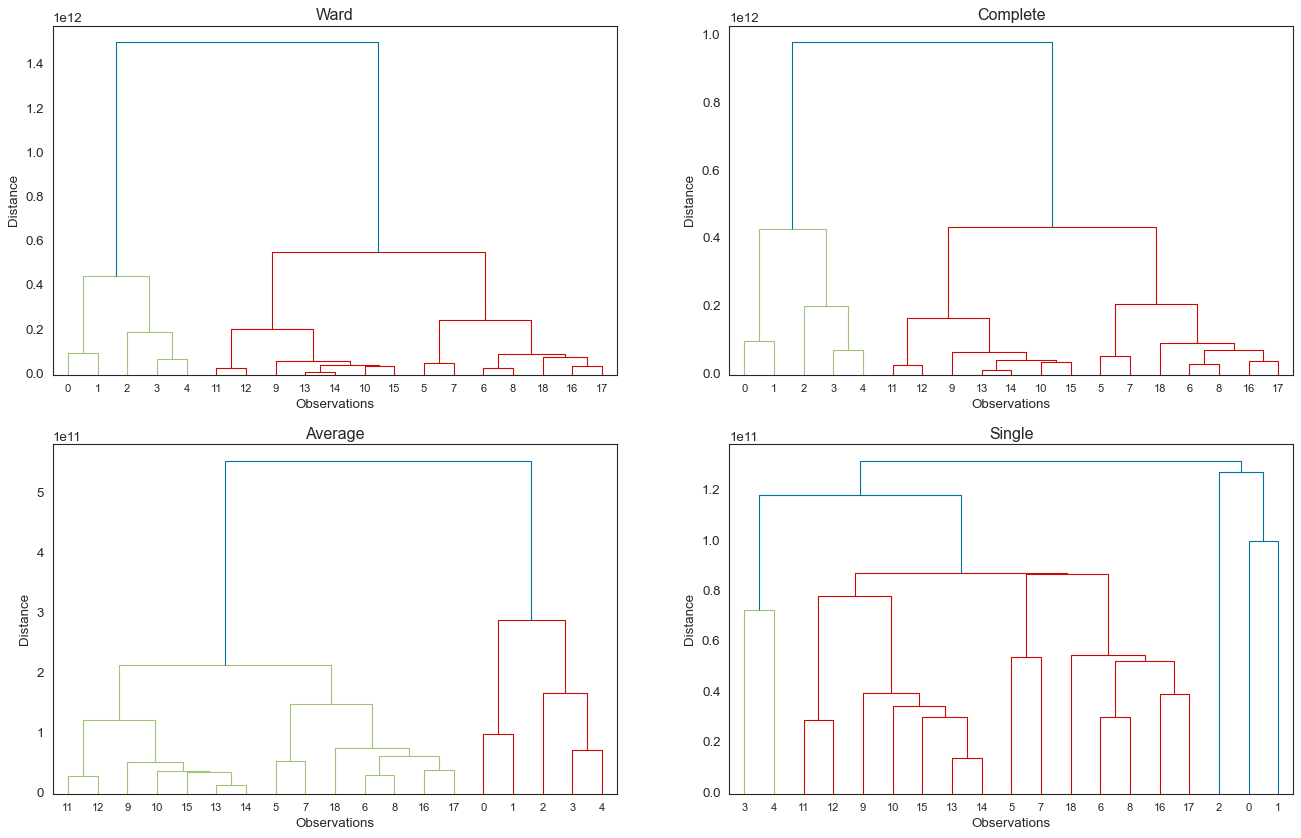

In [978]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Silhouette

In [979]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.6560889955096918
Silhouette Score for 3 clusters: 0.5204307401915554
Silhouette Score for 4 clusters: 0.5205935786059356
Silhouette Score for 5 clusters: 0.5022149314673514
Silhouette Score for 6 clusters: 0.5417897981878276
Silhouette Score for 7 clusters: 0.5299059876890396
Silhouette Score for 8 clusters: 0.4890620582309457
Silhouette Score for 9 clusters: 0.43951340923940857


### Model

In [980]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "ward")
model.fit_predict(X)
model.labels_

array([3, 3, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0],
      dtype=int64)

In [981]:
df["Class_prd"] = model.labels_
df.head()

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class,Class_prd
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,...,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0,3
1,2003,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,...,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271,0,3
2,2004,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,...,10.988,63.940793,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202,0,1
3,2005,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,...,11.181,69.207544,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234,2,1
4,2006,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,...,9.096,75.966220,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095,2,1


### Class Comparison

In [982]:
print(f"Class_0 : {list(df[df.Class == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class == 3].year.unique())}")

Class_0 : [2002, 2003, 2004]
Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_2 : [2005, 2006, 2009]
Class_3 : [2007, 2008, 2010, 2018, 2019, 2020]


In [983]:
print(f"Class_0 : {list(df[df.Class_prd == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class_prd == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class_prd == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class_prd == 3].year.unique())}")

Class_0 : [2007, 2008, 2009, 2010, 2018, 2019, 2020]
Class_1 : [2004, 2005, 2006]
Class_2 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_3 : [2002, 2003]


In [984]:
df["Class_prd"] = df["Class_prd"].replace([0,1,2,3], [3,2,1,0])

In [985]:
print(f"Class_0 : {list(df[df.Class_prd == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class_prd == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class_prd == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class_prd == 3].year.unique())}")

Class_0 : [2002, 2003]
Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_2 : [2004, 2005, 2006]
Class_3 : [2007, 2008, 2009, 2010, 2018, 2019, 2020]


### Adjusted Rand Score For Class & Class_prd

In [986]:
from sklearn.metrics.cluster import adjusted_rand_score

In [987]:
adjusted_rand_score(df["Class"], df["Class_prd"])

0.8165236051502146

### Feature Selection

In [988]:
df.head(1)

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class,Class_prd
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0,0


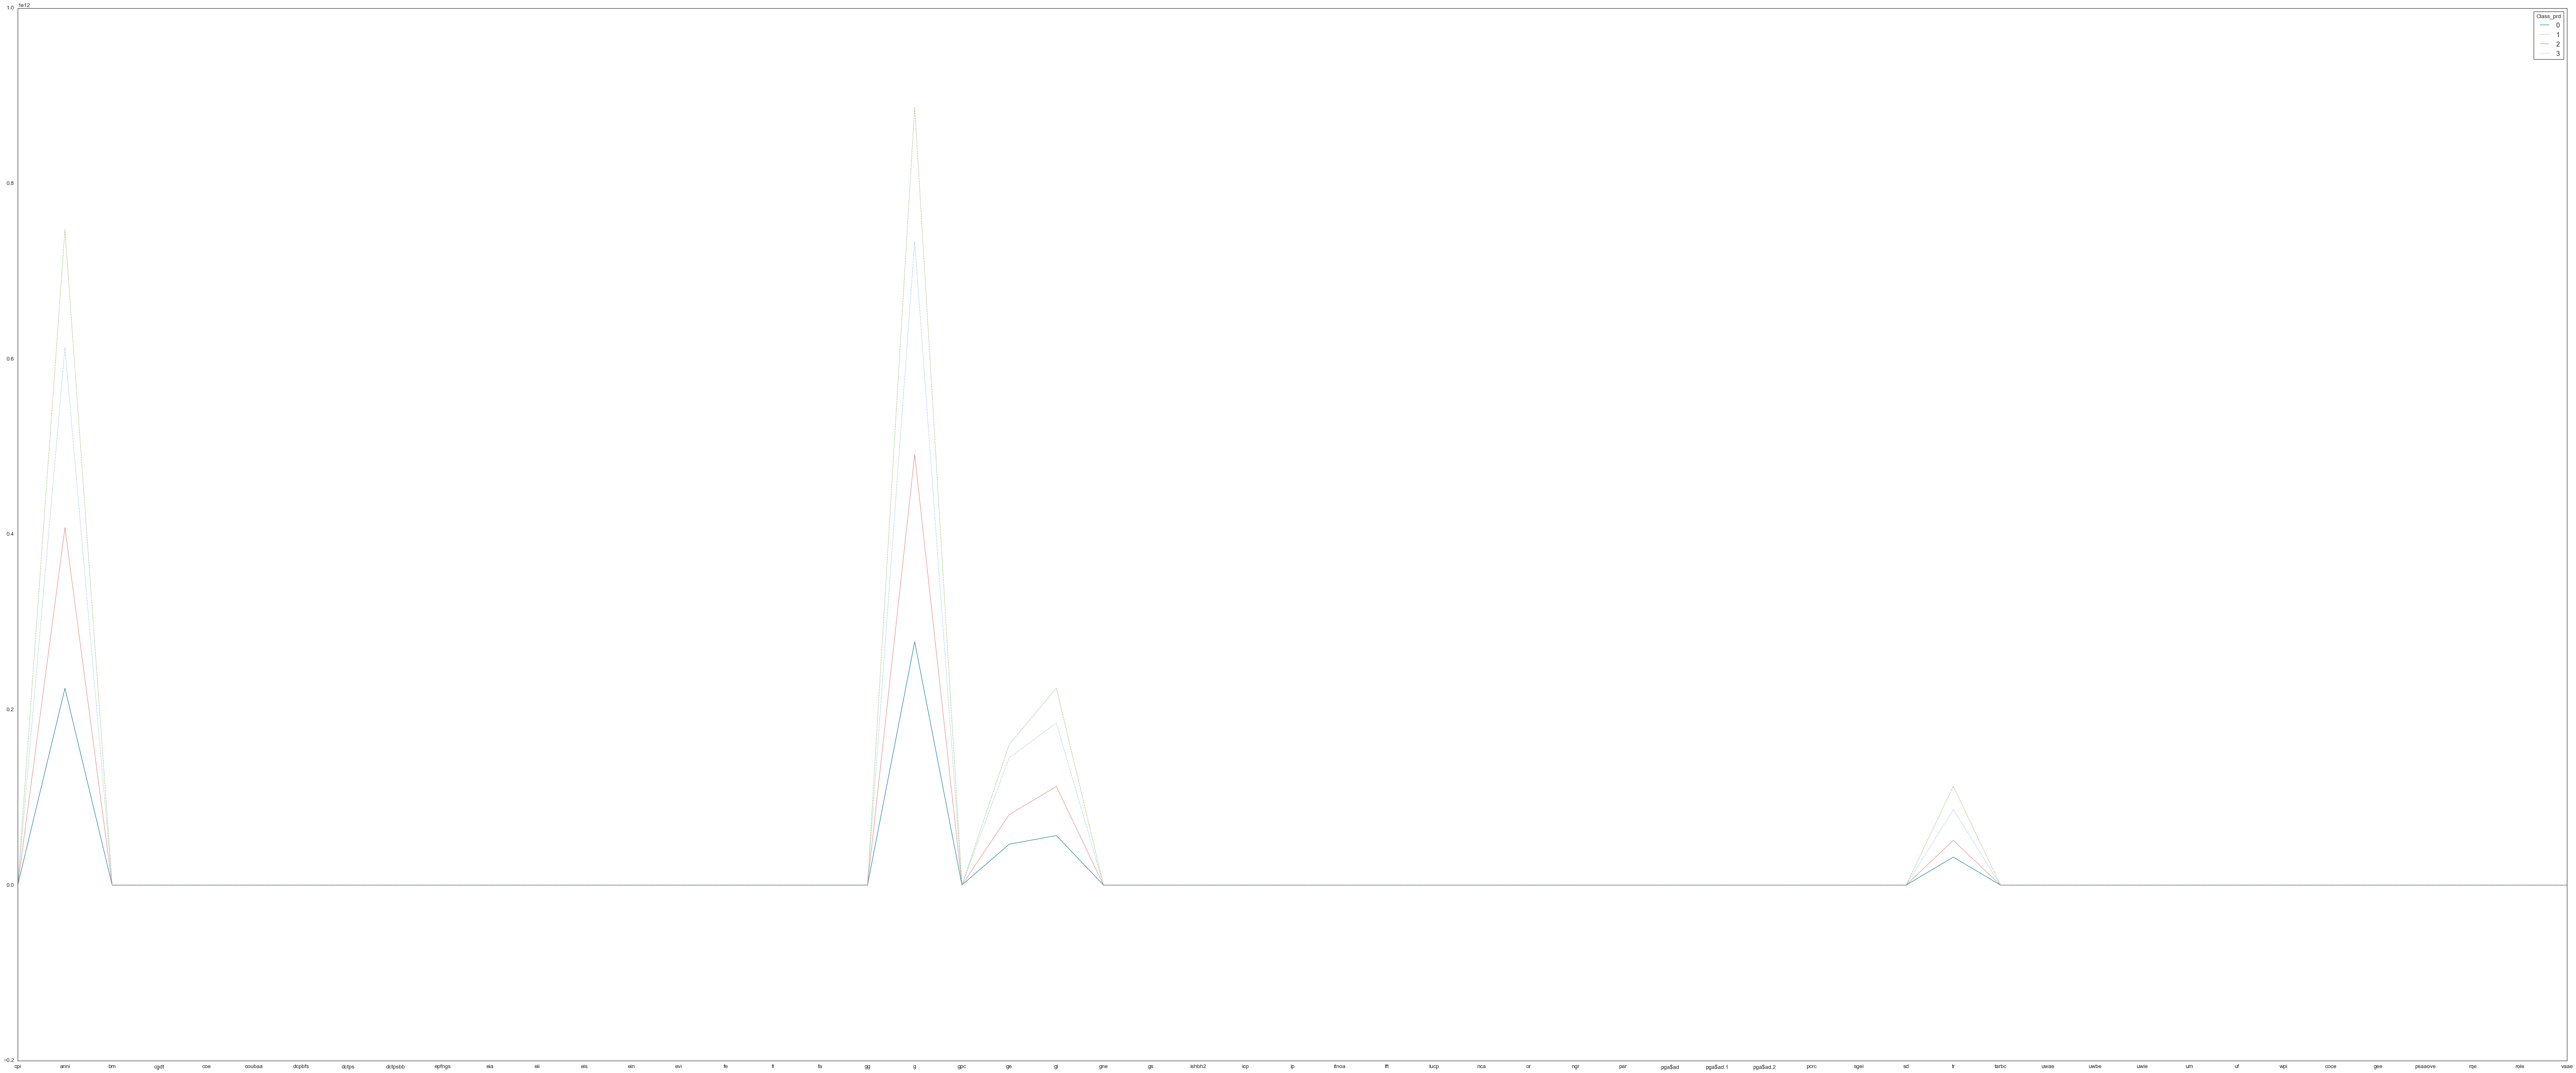

In [989]:
df1 = df.drop(columns=["year","Class"]).groupby("Class_prd").mean().T

plt.figure(figsize=(100,40))
sns.lineplot(data = df1);

In [990]:
# The features should be selected are the same with the features selected on K_Means Clustering we studied before.
# Because of this we will get the "turkey_14_col_data_with_class.csv" dataset
# But this time we select more specific features to get high score

### New Dataset

In [991]:
df2 = pd.read_csv("turkey_14_col_data_with_class.csv")
df2.head(2)

,Unnamed: 0,year,cpi,anni,bm,gg,g,gpc,ge,gi,gne,sd,tr,tarbc,Class
0,0,2002,46.096344,1.929000e+11,38.661392,6.447722,2.402532e+11,3687.956093,4.070500e+10,4.710900e+10,97.772156,57.937006,2.834803e+10,189374.307692,0
1,1,2003,56.054279,2.558000e+11,33.929963,5.763206,3.145924e+11,4760.104019,5.247200e+10,6.588300e+10,100.212742,64.736892,3.554851e+10,155574.127111,0


In [992]:
df2 = df2.drop(columns=["Unnamed: 0", "Class", "cpi", "bm", "gg", "gpc", "sd", "tarbc"])

In [993]:
df2 = df2.apply(pd.to_numeric)

In [994]:
df2.shape

(19, 7)

In [995]:
df2.duplicated().any()

False

In [996]:
df2.isnull().any()

year    False
anni    False
g       False
ge      False
gi      False
gne     False
tr      False
dtype: bool

In [997]:
df2.year.nunique()

19

In [998]:
df2.describe()

,year,anni,g,ge,gi,gne,tr
count,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01
mean,2011.000000,5.890158e+11,7.038760e+11,1.301345e+11,1.744913e+11,102.464949,8.466866e+10
std,5.627314,1.790208e+11,2.085527e+11,4.485755e+10,6.065891e+10,2.472404,3.070865e+10
min,2002.000000,1.929000e+11,2.402532e+11,4.070500e+10,4.710900e+10,97.417172,2.834803e+10
25%,2006.500000,5.000000e+11,6.031652e+11,1.017550e+11,1.345830e+11,100.912472,6.846976e+10
50%,2011.000000,6.428000e+11,7.704622e+11,1.423920e+11,1.938230e+11,103.355218,8.793725e+10
75%,2015.500000,7.220500e+11,8.616565e+11,1.678920e+11,2.234750e+11,104.022484,1.066383e+11
max,2020.000000,8.120000e+11,9.577830e+11,1.822000e+11,2.492820e+11,107.316773,1.310538e+11


In [999]:
df2.head(1)

,year,anni,g,ge,gi,gne,tr
0,2002,1.929000e+11,2.402532e+11,4.070500e+10,4.710900e+10,97.772156,2.834803e+10


In [1000]:
df.head(1)

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class,Class_prd
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0,0


In [1001]:
df2["Class_prd"] = df["Class_prd"]

In [1002]:
df2.head()

,year,anni,g,ge,gi,gne,tr,Class_prd
0,2002,1.929000e+11,2.402532e+11,4.070500e+10,4.710900e+10,97.772156,2.834803e+10,0
1,2003,2.558000e+11,3.145924e+11,5.247200e+10,6.588300e+10,100.212742,3.554851e+10,0
2,2004,3.364000e+11,4.088760e+11,6.883300e+10,9.127100e+10,101.576332,3.730412e+10,2
3,2005,4.211000e+11,5.063083e+11,7.850900e+10,1.114450e+11,102.389822,5.249394e+10,2
4,2006,4.643000e+11,5.570578e+11,9.377800e+10,1.346720e+11,103.973203,6.326484e+10,2


In [1003]:
df2.shape

(19, 8)

## AgglomerativeClustering with new dataset

### Train Test Split with new dataset

In [1004]:
X = df2.drop(["year", "Class_prd"], axis=1)
X.head(1)

,anni,g,ge,gi,gne,tr
0,1.929000e+11,2.402532e+11,4.070500e+10,4.710900e+10,97.772156,2.834803e+10


### Scaling with new dataset

In [1005]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_min = scaler.fit_transform(X)
x_min = pd.DataFrame(data=x_min, columns=X.columns)
x_min.head(2)

,anni,g,ge,gi,gne,tr
0,0.000000,0.000000,0.000000,0.000000,0.035858,0.000000
1,0.101599,0.103604,0.083162,0.092861,0.282392,0.070108


In [1006]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(X)
x_std = pd.DataFrame(data=x_std, columns=X.columns)
x_std.head(2)

,anni,g,ge,gi,gne,tr
0,-2.273313,-2.283965,-2.048264,-2.157521,-1.95008,-1.884288
1,-1.912329,-1.917745,-1.778756,-1.839539,-0.93590,-1.643386


### Hopkins with new dataset

In [1007]:
from pyclustertend import hopkins
print(f"No Scale \t: {hopkins(X, X.shape[0])}")
print(f"MinMax Scale \t: {hopkins(X_min, X_min.shape[0])}")
print(f"StdScl Scale \t: {hopkins(X_std, X_std.shape[0])}")
# Suitable for Clustering >>> close to zero >>> Do Not Use Scaling

No Scale 	: 0.20750893512002289
MinMax Scale 	: 0.31958617950380624
StdScl Scale 	: 0.32449664972899417


### Dendrogram with new dataset

In [1008]:
from scipy.cluster.hierarchy import dendrogram, linkage
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

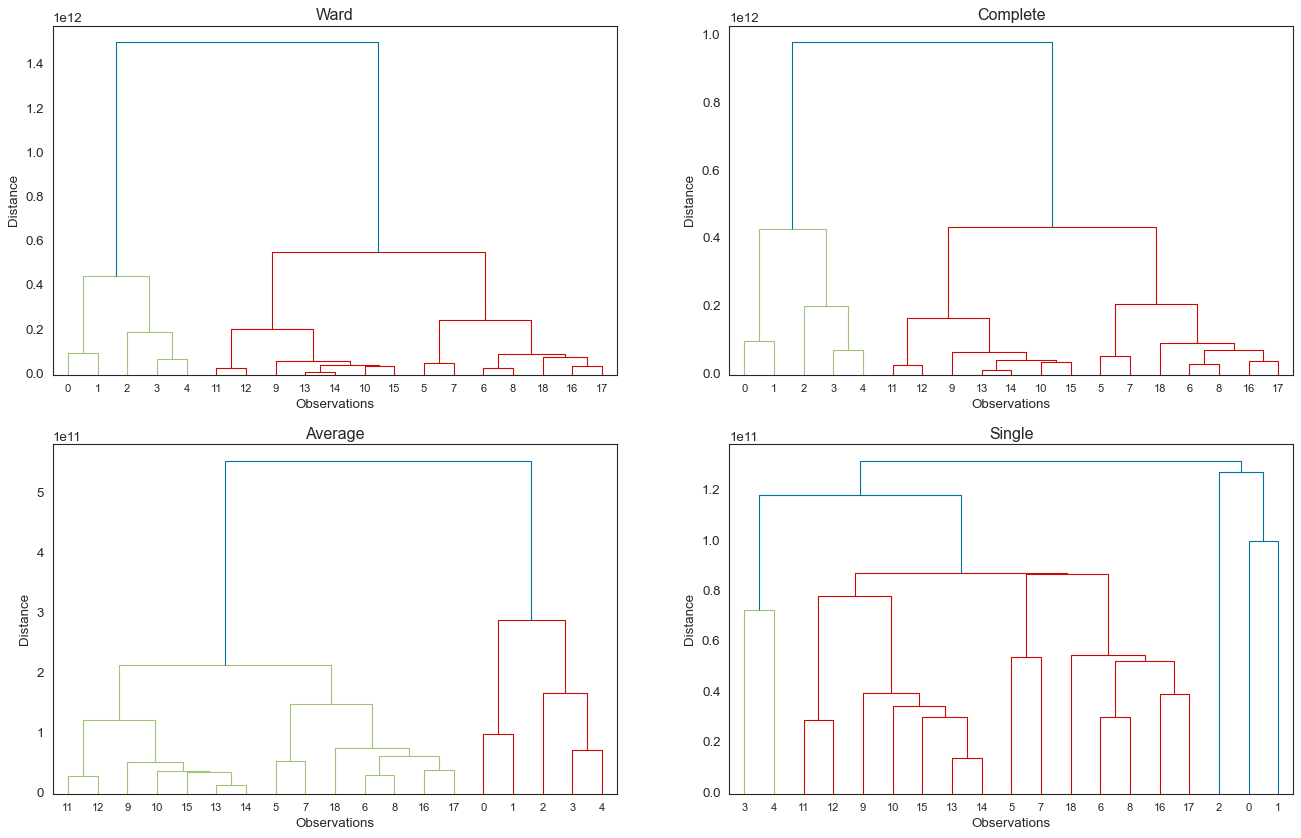

In [1009]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [1010]:
### Will use "complete" and "k"=4

### Silhouette with new dataset

In [1011]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.656089021975077
Silhouette Score for 3 clusters: 0.5204308369249738
Silhouette Score for 4 clusters: 0.5205936772638262
Silhouette Score for 5 clusters: 0.502215080454433
Silhouette Score for 6 clusters: 0.5417899789472769
Silhouette Score for 7 clusters: 0.5299061702189064
Silhouette Score for 8 clusters: 0.48906224077842636
Silhouette Score for 9 clusters: 0.43951337727431444


### Model with new dataset

In [1012]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "complete")
model.fit_predict(X)

array([3, 3, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0],
      dtype=int64)

In [1013]:
model.labels_

array([3, 3, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0],
      dtype=int64)

In [1014]:
X.head(1)

,anni,g,ge,gi,gne,tr
0,1.929000e+11,2.402532e+11,4.070500e+10,4.710900e+10,97.772156,2.834803e+10


In [1015]:
df.head(1)

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class,Class_prd
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0,0


In [1016]:
X["Class_prd1"] = model.labels_
X.head()

,anni,g,ge,gi,gne,tr,Class_prd1
0,1.929000e+11,2.402532e+11,4.070500e+10,4.710900e+10,97.772156,2.834803e+10,3
1,2.558000e+11,3.145924e+11,5.247200e+10,6.588300e+10,100.212742,3.554851e+10,3
2,3.364000e+11,4.088760e+11,6.883300e+10,9.127100e+10,101.576332,3.730412e+10,1
3,4.211000e+11,5.063083e+11,7.850900e+10,1.114450e+11,102.389822,5.249394e+10,1
4,4.643000e+11,5.570578e+11,9.377800e+10,1.346720e+11,103.973203,6.326484e+10,1


In [1017]:
df.head(1)

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class,Class_prd
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0,0


In [1018]:
df["Class_prd1"] = X["Class_prd1"]
df.head(1)

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,wpi,coce,gee,psaaove,rqe,role,vaae,Class,Class_prd,Class_prd1
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0,0,3


### Class Comparison

In [1019]:
print(f"Class_0 : {list(df[df.Class == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class == 3].year.unique())}")

Class_0 : [2002, 2003, 2004]
Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_2 : [2005, 2006, 2009]
Class_3 : [2007, 2008, 2010, 2018, 2019, 2020]


In [1020]:
print(f"Class_0 : {list(df[df.Class_prd == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class_prd == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class_prd == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class_prd == 3].year.unique())}")

Class_0 : [2002, 2003]
Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_2 : [2004, 2005, 2006]
Class_3 : [2007, 2008, 2009, 2010, 2018, 2019, 2020]


In [1021]:
print(f"Class_0 : {list(df[df.Class_prd1 == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class_prd1 == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class_prd1 == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class_prd1 == 3].year.unique())}")

Class_0 : [2007, 2008, 2009, 2010, 2018, 2019, 2020]
Class_1 : [2004, 2005, 2006]
Class_2 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_3 : [2002, 2003]


In [1022]:
df["Class_prd1"] = df["Class_prd1"].replace([0,1,2,3], [3,2,1,0])

In [1023]:
print(f"Class_0 : {list(df[df.Class_prd1 == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class_prd1 == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class_prd1 == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class_prd1 == 3].year.unique())}")

Class_0 : [2002, 2003]
Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_2 : [2004, 2005, 2006]
Class_3 : [2007, 2008, 2009, 2010, 2018, 2019, 2020]


### Adjusted Rand Score For Class & Class_prd & Class_prd1

In [1024]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(df["Class"], df["Class_prd"]))
print(adjusted_rand_score(df["Class"], df["Class_prd1"]))
print(adjusted_rand_score(df["Class_prd"], df["Class_prd1"]))

0.8165236051502146
0.8165236051502146
1.0


In [1025]:
# After choosing the futures with the best discrimination, we got the best adjusted_rand_score.
# And the best clustering:
    # Class_0 : [2002, 2003]
    # Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
    # Class_2 : [2004, 2005, 2006]
    # Class_3 : [2007, 2008, 2009, 2010, 2018, 2019, 2020]
# The last study will be using lots of features on turkey for 20 years with using PCA Clustering :)